![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

  show_id  ...             genre
0      s1  ...  International TV
1      s2  ...            Dramas
2      s3  ...     Horror Movies
3      s4  ...            Action
4      s5  ...            Dramas

[5 rows x 11 columns]
['TV Show' 'Movie']


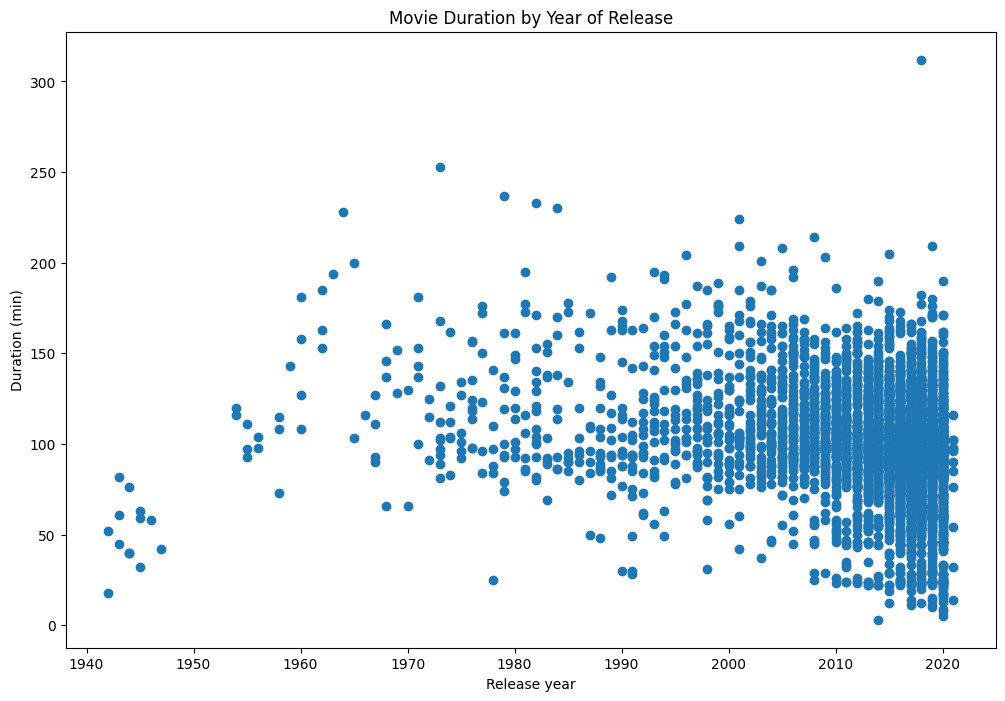

                                                 title  ... duration
35                                           #Rucker50  ...       56
55                 100 Things to do Before High School  ...       44
67   13TH: A Conversation with Oprah Winfrey & Ava ...  ...       37
101                                  3 Seconds Divorce  ...       53
146                                     A 3 Minute Hug  ...       28
162  A Christmas Special: Miraculous: Tales of Lady...  ...       22
171                         A Family Reunion Christmas  ...       29
177                    A Go! Go! Cory Carson Christmas  ...       22
178                    A Go! Go! Cory Carson Halloween  ...       22
179                  A Go! Go! Cory Carson Summer Camp  ...       21
181             A Grand Night In: The Story of Aardman  ...       59
200                            A Love Song for Latasha  ...       20
220                         A Russell Peters Christmas  ...       44
233                              A

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
...,...,...,...,...,...
7679,WWII: Report from the Aleutians,United States,Documentaries,1943,45
7692,Ya no estoy aquí: Una conversación entre Guill...,NaN,Documentaries,2020,15
7718,Yoo Byung Jae: Discomfort Zone,South Korea,Stand-Up,2018,54
7771,Zion,United States,Documentaries,2018,12


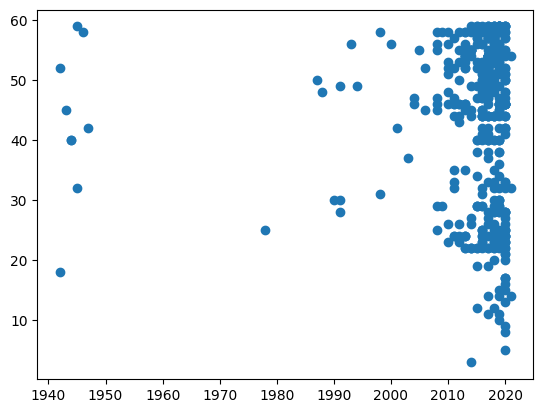

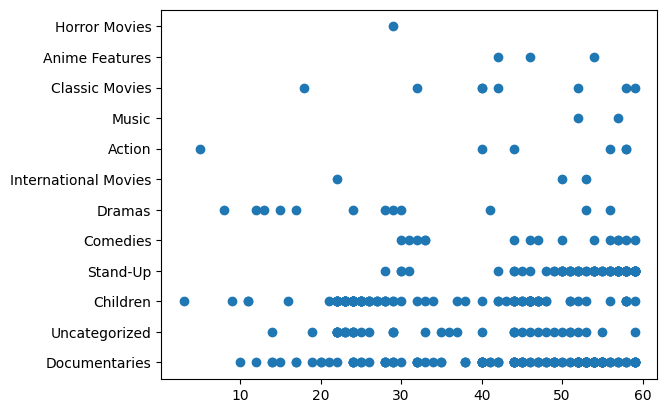

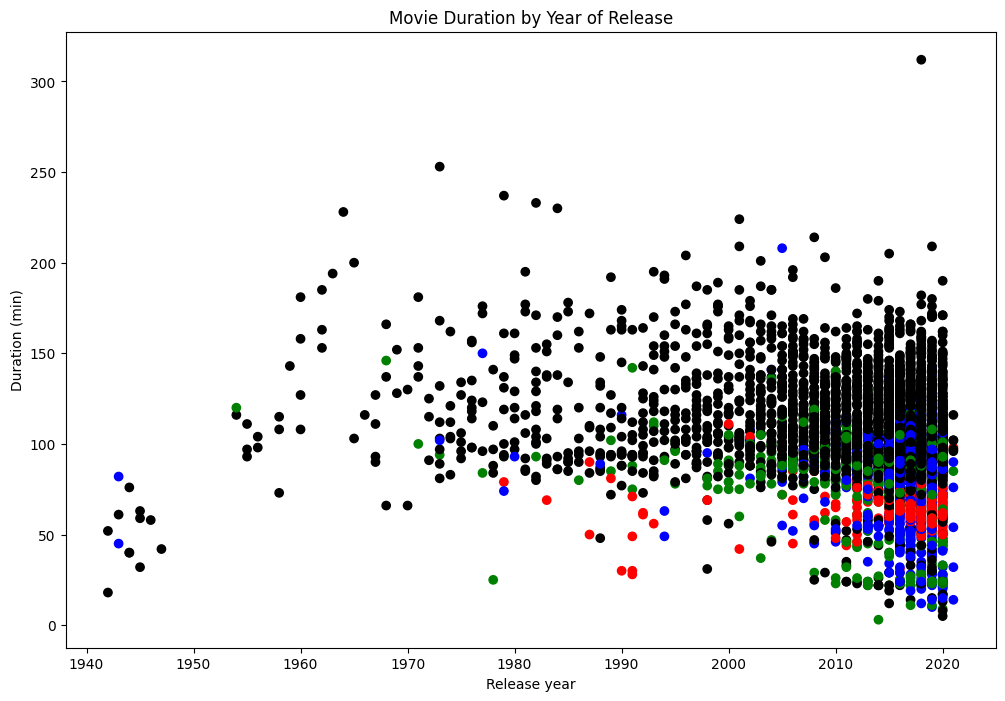

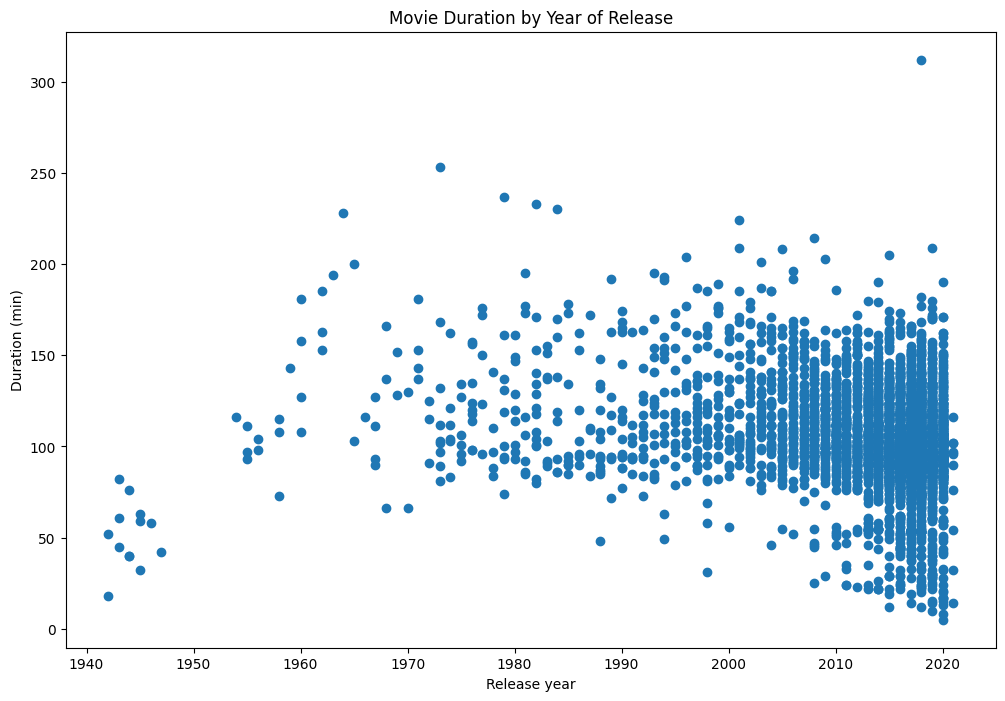

In [36]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Start coding!
#Create a DataFrame from a csv and inspect the Netflix data
netflix = pd.read_csv('netflix_data.csv')
print(netflix.head())
print(netflix['type'].unique())

#Filter "TV shows" and subset the DF for "Movies"
movies = netflix[netflix['type'] == 'Movie']

#Subset the columns of the new DF
netflix_movies = movies[['title','country','genre','release_year','duration']]
fig = plt.figure(figsize=(12,8))
plt.scatter(x=netflix_movies['release_year'],y=netflix_movies['duration'])
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title('Movie Duration by Year of Release')
plt.show()

# We can see that newer movies are overrepresented on Netflix, many short movies have been released in the past two decades.
# Upon further investigation I found that some films are less than an hour long. Let's filter our DataFrame for movies with duration under 60 minutes and see if there are anything in common.
# This might give us some insights.

#Filter DF by Movie duration
short_movies = netflix_movies[netflix_movies['duration'] < 60]
print(short_movies.head(20))
display(short_movies)
plt.scatter(x=short_movies['release_year'],y=short_movies['duration'])
plt.show()
plt.scatter(x=short_movies['duration'],y=short_movies['genre'])
plt.show()

#It seems that many of the films that are under 60 minutes fall into genres such as "Children", "Stand-up" and "Documentaries". This makes sense as these genres are usually less than 90 minutes.
#We should eliminate these rows from our DataFrame and plot the values again. But first we should explore the effect of these genres on our data by marking them with a different color for visualisation.

#In Python, there are many ways to do this, but one fun way might be to use a loop to generate a list of colors based on the contents of the <code>genre</code> column. Much as we did in Intermediate Python, we can then pass this list to our plotting function in a later step to color all non-typical genres in a different color!

#Create a list of colors based on movie genres
colors =[]

for lab, row in netflix_movies.iterrows():
    if row['genre'] == 'Children':
        colors.append('green')
    elif row['genre'] == 'Documentaries':
        colors.append('blue')
    elif row['genre'] == 'Stand-Up':
       colors.append('red')
    else:
        colors.append('black')

#We now have a <code>colors</code> list that we can pass to our scatter plot, which should allow us to visually inspect whether these genres might be responsible for shorter movie duration.      
fig = plt.figure(figsize=(12,8))
plt.scatter(x=netflix_movies['release_year'],y=netflix_movies['duration'],c=colors)
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title('Movie Duration by Year of Release')
plt.show()

#Well, as we suspected, non-typical genres such as children's movies and documentaries are all clustered around the bottom half of the plot. 

#Filter the three top short movie genres 'Children','Documentaries' and 'Stand-Up' and see if there is a huge difference in visualisation
updated_movies = netflix_movies[~netflix_movies['genre'].isin(['Children','Documentaris','Stand-Up'])]
fig = plt.figure(figsize=(12,8))
plt.scatter(x=updated_movies['release_year'],y=updated_movies['duration'])
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title('Movie Duration by Year of Release')
plt.show()

#There are still a lot of short movies after filtering certain genres. We can't know for certain until we perform additional analyses. 
answer = 'maybe'